In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
file = Path("nutrition.csv", encoding='UTF-8')
file_df = pd.read_csv(file)
file_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [3]:
#Drop irrelevant columns, rename, and reorder.

file_df[["Topic", "Report"]] = file_df["Topic"].apply(lambda x: pd.Series(str(x).split(" - ")))

cdc_data = file_df.drop(columns=["YearEnd","LocationAbbr","Datasource","Class","Data_Value_Unit",
                                           "Data_Value_Type","Data_Value_Alt","Data_Value_Footnote_Symbol",
                                           "Data_Value_Footnote","Low_Confidence_Limit","High_Confidence_Limit ",
                                           "Total","GeoLocation","ClassID","TopicID","DataValueTypeID","Report"])

cdc_data = cdc_data.rename(columns={"YearStart":"Year","LocationDesc":"Location","Data_Value":"Response (%)",
                                    "Sample_Size":"Sample Size", "Age(years)":"Age (years)", "QuestionID":"Question ID",
                                    "LocationID":"Location ID","StratificationCategory1":"Stratification","Stratification1":"Bin",
                                    "StratificationCategoryId1":"Category ID", "StratificationID1":"Bin ID"})

cdc_data = cdc_data[["Year","Location","Topic","Question","Response (%)","Sample Size","Age (years)","Education",
                     "Gender","Income","Race/Ethnicity","Stratification","Bin","Location ID","Question ID","Category ID","Bin ID"]]

cdc_data.head()

,Year,Location,Topic,Question,Response (%),Sample Size,Age (years),Education,Gender,Income,Race/Ethnicity,Stratification,Bin,Location ID,Question ID,Category ID,Bin ID
0,2020,National,Physical Activity,Percent of adults who engage in no leisure-tim...,30.6,31255.0,NaN,NaN,NaN,NaN,Hispanic,Race/Ethnicity,Hispanic,59,Q047,RACE,RACEHIS
1,2014,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.3,842.0,NaN,High school graduate,NaN,NaN,NaN,Education,High school graduate,66,Q036,EDU,EDUHSGRAD
2,2013,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,62562.0,NaN,NaN,NaN,"$50,000 - $74,999",NaN,Income,"$50,000 - $74,999",59,Q036,INC,INC5075
3,2013,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.7,60069.0,NaN,NaN,NaN,Data not reported,NaN,Income,Data not reported,59,Q037,INC,INCNR
4,2015,National,Physical Activity,Percent of adults who achieve at least 300 min...,26.6,30904.0,NaN,NaN,NaN,"Less than $15,000",NaN,Income,"Less than $15,000",59,Q045,INC,INCLESS15


In [4]:
state_obesity = cdc_data.loc[cdc_data["Question ID"]=="Q036"][cdc_data["Stratification"]=="Total"]
state_obesity = state_obesity.drop(columns=["Topic","Age (years)","Education","Gender","Income","Race/Ethnicity","Bin","Location ID","Category ID","Bin ID"]).sort_values(by=["Location"])
state_obesity

C:\Users\anconde\AppData\Local\Temp\ipykernel_10860\952111760.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  state_obesity = cdc_data.loc[cdc_data["Question ID"]=="Q036"][cdc_data["Stratification"]=="Total"]


,Year,Location,Question,Response (%),Sample Size,Stratification,Question ID
10345,2020,Alabama,Percent of adults aged 18 years and older who ...,39.0,4973.0,Total,Q036
51402,2019,Alabama,Percent of adults aged 18 years and older who ...,36.1,6521.0,Total,Q036
59856,2013,Alabama,Percent of adults aged 18 years and older who ...,32.4,6244.0,Total,Q036
5478,2018,Alabama,Percent of adults aged 18 years and older who ...,36.2,6144.0,Total,Q036
20654,2011,Alabama,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,Q036
...,...,...,...,...,...,...,...
7278,2020,Wyoming,Percent of adults aged 18 years and older who ...,30.7,4410.0,Total,Q036
44174,2019,Wyoming,Percent of adults aged 18 years and older who ...,29.7,4306.0,Total,Q036
2269,2018,Wyoming,Percent of adults aged 18 years and older who ...,29.0,4175.0,Total,Q036
54085,2012,Wyoming,Percent of adults aged 18 years and older who ...,24.6,5976.0,Total,Q036


In [5]:
state_obesity["Count"] = round((state_obesity["Response (%)"]/100)*state_obesity["Sample Size"],0)
state_obesity

,Year,Location,Question,Response (%),Sample Size,Stratification,Question ID,Count
10345,2020,Alabama,Percent of adults aged 18 years and older who ...,39.0,4973.0,Total,Q036,1939.0
51402,2019,Alabama,Percent of adults aged 18 years and older who ...,36.1,6521.0,Total,Q036,2354.0
59856,2013,Alabama,Percent of adults aged 18 years and older who ...,32.4,6244.0,Total,Q036,2023.0
5478,2018,Alabama,Percent of adults aged 18 years and older who ...,36.2,6144.0,Total,Q036,2224.0
20654,2011,Alabama,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,Q036,2337.0
...,...,...,...,...,...,...,...,...
7278,2020,Wyoming,Percent of adults aged 18 years and older who ...,30.7,4410.0,Total,Q036,1354.0
44174,2019,Wyoming,Percent of adults aged 18 years and older who ...,29.7,4306.0,Total,Q036,1279.0
2269,2018,Wyoming,Percent of adults aged 18 years and older who ...,29.0,4175.0,Total,Q036,1211.0
54085,2012,Wyoming,Percent of adults aged 18 years and older who ...,24.6,5976.0,Total,Q036,1470.0


In [6]:
reduced_state_obesity = state_obesity[["Location","Question","Response (%)","Sample Size","Count"]]
final_state_obesity = reduced_state_obesity.groupby(["Question","Location"]).sum()

In [7]:
final_state_obesity["Percent"] = round(final_state_obesity["Count"]/final_state_obesity["Sample Size"]*100,2)
final_state_obesity = final_state_obesity.drop(columns=["Response (%)"])
final_state_obesity

Sample Size  \
Question                                           Location                            
Percent of adults aged 18 years and older who h... Alabama                   72428.0   
                                                   Alaska                    38847.0   
                                                   Arizona                   96806.0   
                                                   Arkansas                  53298.0   
                                                   California               111618.0   
                                                   Colorado                 120382.0   
                                                   Connecticut               92666.0   
                                                   Delaware                  44153.0   
                                                   District of Columbia      40124.0   
                                                   Florida                  162330.0   
                                                   Georgia                   72911.0   
                                                   Guam                      14242.0   
                                                   Hawaii                    80604.0   
                                                   Idaho                     56532.0   
                                                   Illinois                  52224.0   
                                                   Indiana                   96803.0   
                                                   Iowa                      82978.0   
                                                   Kansas                   163053.0   
                                                   Kentucky                  91309.0   
                                                   Louisiana                 61999.0   
                                                   Maine                    107234.0   
                                                   Maryland                 143708.0   
                                                   Massachusetts            116360.0   
                                                   Michigan                 104943.0   
                                                   Minnesota                159177.0   
                                                   Mississippi               62574.0   
                                                   Missouri                  78563.0   
                                                   Montana                   73670.0   
                                                   National                4550675.0   
                                                   Nebraska                 180578.0   
                                                   Nevada                    38735.0   
                                                   New Hampshire             64255.0   
                                                   New Jersey                99030.0   
                                                   New Mexico                76566.0   
                                                   New York                 171853.0   
                                                   North Carolina            71105.0   
                                                   North Dakota              60641.0   
                                                   Ohio                     127412.0   
                                                   Oklahoma                  70930.0   
                                                   Oregon                    57104.0   
                                                   Pennsylvania              91480.0   
                                                   Puerto Rico               45348.0   
                                                   Rhode Island              59492.0   
                                                   South Carolina           106244.0   
                         

In [8]:
state_obesity = cdc_data.loc[cdc_data["Question ID"]=="Q043"][cdc_data["Stratification"]=="Total"]
state_obesity = state_obesity.drop(columns=["Topic","Age (years)","Education","Gender","Income","Race/Ethnicity","Bin","Location ID","Category ID","Bin ID"]).sort_values(by=["Location"])
state_obesity

C:\Users\anconde\AppData\Local\Temp\ipykernel_10860\3391953644.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  state_obesity = cdc_data.loc[cdc_data["Question ID"]=="Q043"][cdc_data["Stratification"]=="Total"]


,Year,Location,Question,Response (%),Sample Size,Stratification,Question ID
36143,2013,Alabama,Percent of adults who achieve at least 150 min...,45.4,5915.0,Total,Q043
33934,2017,Alabama,Percent of adults who achieve at least 150 min...,42.8,5952.0,Total,Q043
53485,2019,Alabama,Percent of adults who achieve at least 150 min...,45.9,6207.0,Total,Q043
75975,2011,Alabama,Percent of adults who achieve at least 150 min...,42.4,7191.0,Total,Q043
24521,2015,Alabama,Percent of adults who achieve at least 150 min...,44.6,7025.0,Total,Q043
...,...,...,...,...,...,...,...
12431,2017,Wyoming,Percent of adults who achieve at least 150 min...,53.9,4157.0,Total,Q043
48190,2019,Wyoming,Percent of adults who achieve at least 150 min...,55.0,4217.0,Total,Q043
36460,2013,Wyoming,Percent of adults who achieve at least 150 min...,54.2,5796.0,Total,Q043
69849,2011,Wyoming,Percent of adults who achieve at least 150 min...,53.1,6332.0,Total,Q043


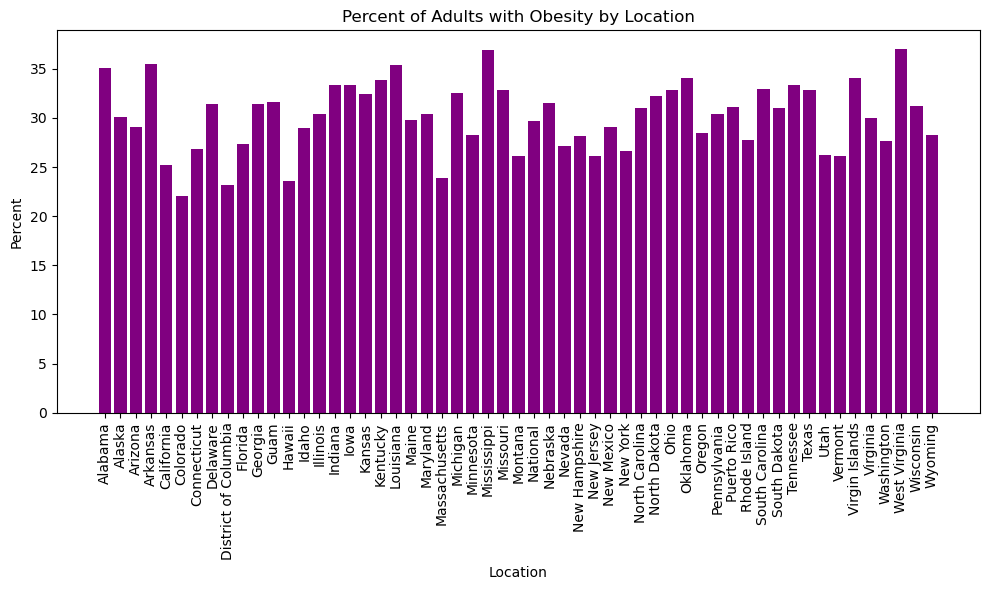

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Complete data
data = [
    ("Alabama", 35.06),
    ("Alaska", 30.13),
    ("Arizona", 29.11),
    ("Arkansas", 35.54),
    ("California", 25.18),
    ("Colorado", 22.07),
    ("Connecticut", 26.85),
    ("Delaware", 31.41),
    ("District of Columbia", 23.17),
    ("Florida", 27.37),
    ("Georgia", 31.41),
    ("Guam", 31.67),
    ("Hawaii", 23.56),
    ("Idaho", 28.97),
    ("Illinois", 30.41),
    ("Indiana", 33.31),
    ("Iowa", 33.31),
    ("Kansas", 32.44),
    ("Kentucky", 33.91),
    ("Louisiana", 35.42),
    ("Maine", 29.76),
    ("Maryland", 30.37),
    ("Massachusetts", 23.92),
    ("Michigan", 32.57),
    ("Minnesota", 28.25),
    ("Mississippi", 36.95),
    ("Missouri", 32.87),
    ("Montana", 26.11),
    ("National", 29.70),
    ("Nebraska", 31.53),
    ("Nevada", 27.16),
    ("New Hampshire", 28.12),
    ("New Jersey", 26.11),
    ("New Mexico", 29.05),
    ("New York", 26.69),
    ("North Carolina", 31.03),
    ("North Dakota", 32.29),
    ("Ohio", 32.88),
    ("Oklahoma", 34.10),
    ("Oregon", 28.50),
    ("Pennsylvania", 30.36),
    ("Puerto Rico", 31.08),
    ("Rhode Island", 27.72),
    ("South Carolina", 32.92),
    ("South Dakota", 31.06),
    ("Tennessee", 33.36),
    ("Texas", 32.84),
    ("Utah", 26.25),
    ("Vermont", 26.15),
    ("Virgin Islands", 34.10),
    ("Virginia", 30.05),
    ("Washington", 27.62),
    ("West Virginia", 37.07),
    ("Wisconsin", 31.25),
    ("Wyoming", 28.26)
]

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=["Location", "Percent"])

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(df["Location"], df["Percent"], color='purple')  # You can choose a color of your preference

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Percent")
plt.title("Percent of Adults with Obesity by Location")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [9]:
state_obesity["Count"] = round((state_obesity["Response (%)"]/100)*state_obesity["Sample Size"],0)
state_obesity

,Year,Location,Question,Response (%),Sample Size,Stratification,Question ID,Count
36143,2013,Alabama,Percent of adults who achieve at least 150 min...,45.4,5915.0,Total,Q043,2685.0
33934,2017,Alabama,Percent of adults who achieve at least 150 min...,42.8,5952.0,Total,Q043,2547.0
53485,2019,Alabama,Percent of adults who achieve at least 150 min...,45.9,6207.0,Total,Q043,2849.0
75975,2011,Alabama,Percent of adults who achieve at least 150 min...,42.4,7191.0,Total,Q043,3049.0
24521,2015,Alabama,Percent of adults who achieve at least 150 min...,44.6,7025.0,Total,Q043,3133.0
...,...,...,...,...,...,...,...,...
12431,2017,Wyoming,Percent of adults who achieve at least 150 min...,53.9,4157.0,Total,Q043,2241.0
48190,2019,Wyoming,Percent of adults who achieve at least 150 min...,55.0,4217.0,Total,Q043,2319.0
36460,2013,Wyoming,Percent of adults who achieve at least 150 min...,54.2,5796.0,Total,Q043,3141.0
69849,2011,Wyoming,Percent of adults who achieve at least 150 min...,53.1,6332.0,Total,Q043,3362.0


In [10]:
reduced_state_obesity = state_obesity[["Location","Question","Response (%)","Sample Size","Count"]]
final_state_obesity = reduced_state_obesity.groupby(["Question","Location"]).sum()

In [11]:
final_state_obesity["Percent"] = round(final_state_obesity["Count"]/final_state_obesity["Sample Size"]*100,2)
final_state_obesity = final_state_obesity.drop(columns=["Response (%)"])
final_state_obesity

Sample Size  \
Question                                           Location                            
Percent of adults who achieve at least 150 minu... Alabama                   32290.0   
                                                   Alaska                    16137.0   
                                                   Arizona                   37894.0   
                                                   Arkansas                  22825.0   
                                                   California                55712.0   
                                                   Colorado                  52266.0   
                                                   Connecticut               40697.0   
                                                   Delaware                  19929.0   
                                                   District of Columbia      17949.0   
                                                   Florida                   82599.0   
                                                   Georgia                   31878.0   
                                                   Guam                       5011.0   
                                                   Hawaii                    34902.0   
                                                   Idaho                     25000.0   
                                                   Illinois                  25466.0   
                                                   Indiana                   42032.0   
                                                   Iowa                      35552.0   
                                                   Kansas                    90228.0   
                                                   Kentucky                  39859.0   
                                                   Louisiana                 27073.0   
                                                   Maine                     46984.0   
                                                   Maryland                  58461.0   
                                                   Massachusetts             53505.0   
                                                   Michigan                  49928.0   
                                                   Minnesota                 71354.0   
                                                   Mississippi               29345.0   
                                                   Missouri                  32350.0   
                                                   Montana                   35450.0   
                                                   National                2027131.0   
                                                   Nebraska                  83668.0   
                                                   Nevada                    18078.0   
                                                   New Hampshire             28019.0   
                                                   New Jersey                45719.0   
                                                   New Mexico                34192.0   
                                                   New York                  47487.0   
                                                   North Carolina            32983.0   
                                                   North Dakota              27811.0   
                                                   Ohio                      53336.0   
                                                   Oklahoma                  33013.0   
                                                   Oregon                    25395.0   
                                                   Pennsylvania              37460.0   
                                                   Puerto Rico               15298.0   
                                                   Rhode Island              27269.0   
                                                   South Carolina            48005.0   
                         

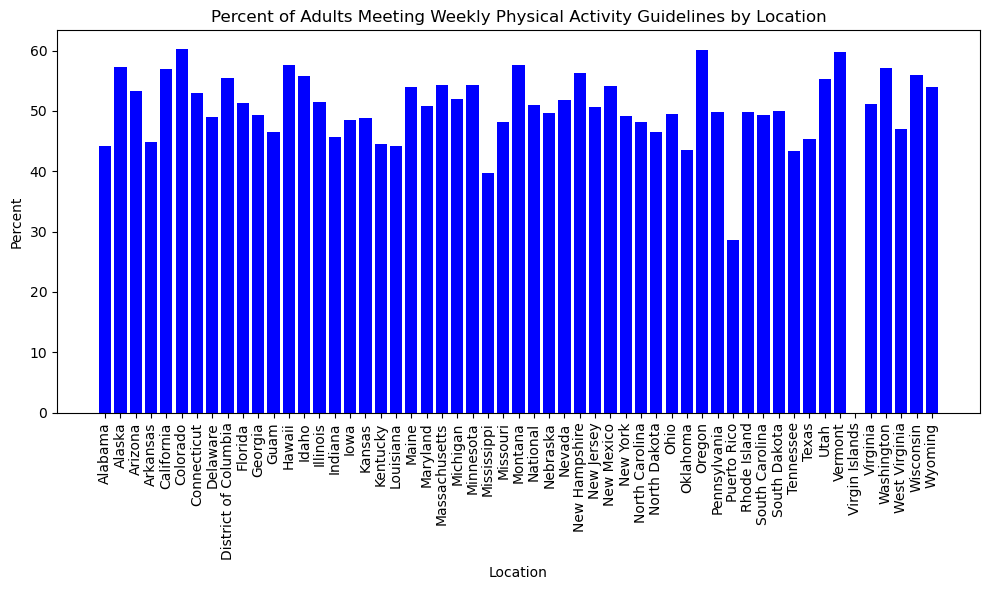

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = [
    ("Alabama", 44.17),
    ("Alaska", 57.29),
    ("Arizona", 53.24),
    ("Arkansas", 44.83),
    ("California", 56.99),
    ("Colorado", 60.33),
    ("Connecticut", 52.98),
    ("Delaware", 48.92),
    ("District of Columbia", 55.51),
    ("Florida", 51.39),
    ("Georgia", 49.30),
    ("Guam", 46.44),
    ("Hawaii", 57.60),
    ("Idaho", 55.75),
    ("Illinois", 51.40),
    ("Indiana", 45.60),
    ("Iowa", 48.51),
    ("Kansas", 48.84),
    ("Kentucky", 44.55),
    ("Louisiana", 44.21),
    ("Maine", 54.00),
    ("Maryland", 50.76),
    ("Massachusetts", 54.24),
    ("Michigan", 52.03),
    ("Minnesota", 54.21),
    ("Mississippi", 39.65),
    ("Missouri", 48.17),
    ("Montana", 57.58),
    ("National", 50.90),
    ("Nebraska", 49.66),
    ("Nevada", 51.81),
    ("New Hampshire", 56.24),
    ("New Jersey", 50.59),
    ("New Mexico", 54.15),
    ("New York", 49.21),
    ("North Carolina", 48.23),
    ("North Dakota", 46.45),
    ("Ohio", 49.51),
    ("Oklahoma", 43.50),
    ("Oregon", 60.01),
    ("Pennsylvania", 49.86),
    ("Puerto Rico", 28.64),
    ("Rhode Island", 49.81),
    ("South Carolina", 49.36),
    ("South Dakota", 50.06),
    ("Tennessee", 43.33),
    ("Texas", 45.34),
    ("Utah", 55.26),
    ("Vermont", 59.68),
    ("Virgin Islands", float("nan")),  # NaN value
    ("Virginia", 51.14),
    ("Washington", 57.17),
    ("West Virginia", 46.96),
    ("Wisconsin", 55.93),
    ("Wyoming", 54.04)
]

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=["Location", "Percent"])

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(df["Location"], df["Percent"], color='blue')  # You can choose a color of your preference

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Percent")
plt.title("Percent of Adults Meeting Weekly Physical Activity Guidelines by Location")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()